In [3]:
# pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek/aaamlp")

print("Path to dataset files:", path)

/Users/akhichoudhary/miniconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/akhichoudhary/.cache/kagglehub/datasets/abhishek/aaamlp/versions/1


In [2]:
import pandas as pd
df = pd.read_csv("/Users/akhichoudhary/.cache/kagglehub/datasets/abhishek/aaamlp/versions/1/winequality-red.csv")

Text(0, 0.5, 'count')

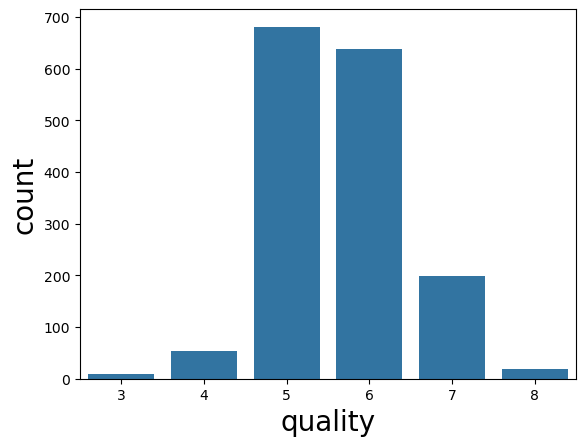

In [5]:
import seaborn as sns
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)
# ═══════════════════════════════════

In [6]:
quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [7]:
df.loc[:,'quality']=df.quality.map(quality_mapping)

In [8]:
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.2,0.330,0.39,2.50,0.074,29.0,48.0,0.99528,3.32,0.88,12.4,4
1,8.3,0.615,0.22,2.60,0.087,6.0,19.0,0.99820,3.26,0.61,9.3,2
2,11.5,0.350,0.49,3.30,0.070,10.0,37.0,1.00030,3.32,0.91,11.0,3
3,8.8,0.600,0.29,2.20,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,2
4,7.2,0.450,0.15,2.00,0.078,10.0,28.0,0.99609,3.29,0.51,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.5,3
1595,8.9,0.120,0.45,1.80,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,4
1596,12.3,0.390,0.63,2.30,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,2
1597,10.4,0.330,0.63,2.80,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,4


In [10]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
# df = df.sample(frac=1).reset_index(drop=True)
df=df.sample(frac=1).reset_index(drop=True)

In [11]:
df_train=df.head(1000)
df_test=df.tail(599)

In [12]:
from sklearn import tree
from sklearn import metrics

In [13]:
clf=tree.DecisionTreeClassifier(max_depth=7)

In [14]:
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']

In [15]:
clf.fit(df_train[cols],df_train['quality'])

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
train_pred=clf.predict(df_train[cols])
test_pred=clf.predict(df_test[cols])
train_accuracy=metrics.accuracy_score(df_train.quality,train_pred)
test_accuracy=metrics.accuracy_score(df_test.quality,test_pred)

In [17]:
print(train_accuracy)
print(test_accuracy)

0.772
0.5859766277128547


In [18]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns\
# this is our global size of label text
# on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [19]:
for depth in range(1,25):
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity',
            'volatile acidity',
            'citric acid',
            'residual sugar',
            'chlorides',
            'free sulfur dioxide',
            'total sulfur dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol']
    clf.fit(df_train[cols],df_train.quality)
    train_predict=clf.predict(df_train[cols])
    test_predict=clf.predict(df_test[cols])
    train_Accuracy=metrics.accuracy_score(df_train.quality,train_predict)
    test_Accuracy=metrics.accuracy_score(df_test.quality,test_predict)
    train_accuracies.append(train_Accuracy)
    test_accuracies.append(test_Accuracy)
    

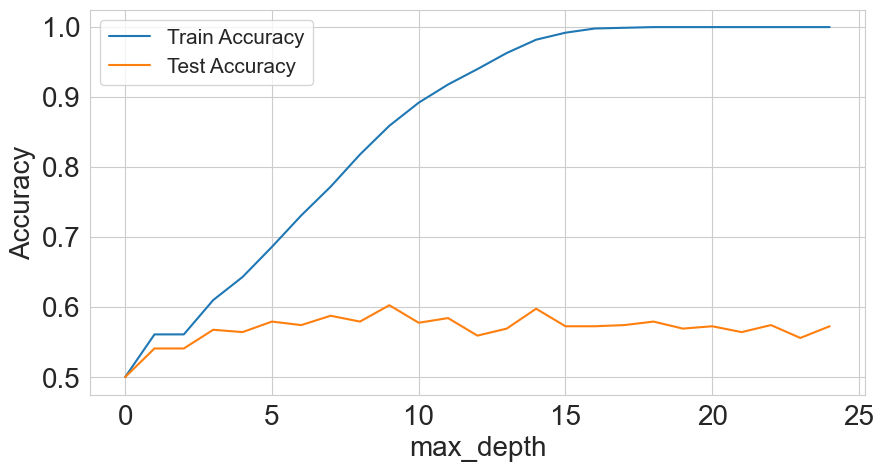

In [20]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='Train Accuracy')
plt.plot(test_accuracies,label='Test Accuracy')
plt.legend(loc='upper left',prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth',size=20)
plt.ylabel('Accuracy',size=20)
plt.show()

Another definition of overfitting would be when the
test loss increases as we keep improving training loss.

### k-fold cross validation

In [21]:
import pandas as pd
from sklearn import model_selection


In [22]:
import os
os.chdir("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml")
print(os.getcwd())


/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml


In [23]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a CSV file called train.csv
    df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/train.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
# the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
# fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)
# ══════════════════════════════════════════════════════

### stratified k-fold cross validation

In [24]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a csv file called train.csv
    df = pd.read_csv("train.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
# the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
# fetch targets
    y = df.target.values
# initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
# save the new csv with kfold column
        df.to_csv("train_folds.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [28]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
def create_folds(data):
# we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(
    data["target"], bins=num_bins, labels=False
    )
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    # drop the bins column
    data = data.drop("bins", axis=1)
    # return dataframe with folds
    return data
if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
    )
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
    # create folds
    df = create_folds(df)

/Users/akhichoudhary/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
